# Single Digit Memorization Visualizations

In [128]:
import torch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from transformer_lens import HookedTransformer

In [108]:
sns.set_theme()
sns.set_style("whitegrid")
plt.style.use("alan.mplstyle")

In [25]:
m = HookedTransformer.from_pretrained("gemma-2b")

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loaded pretrained model gemma-2b into HookedTransformer


In [136]:
prob = pickle.load(open("../probs.pkl", "rb"))
all_block_results = pickle.load(open("../all_blocks.pkl", "rb"))
clean_logits = pickle.load(open("../all_clean_logits.pkl", "rb"))

In [137]:
labels = m.to_str_tokens(prob)

In [138]:
labels

[['<bos>', '2', ' +', ' ', '1', ' =', ' ', '3'],
 ['<bos>', '5', ' +', ' ', '4', ' =', ' ', '9'],
 ['<bos>', '4', ' +', ' ', '3', ' =', ' ', '7'],
 ['<bos>', '2', ' +', ' ', '7', ' =', ' ', '9'],
 ['<bos>', '1', ' +', ' ', '1', ' =', ' ', '2'],
 ['<bos>', '2', ' +', ' ', '4', ' =', ' ', '6'],
 ['<bos>', '1', ' +', ' ', '3', ' =', ' ', '4'],
 ['<bos>', '5', ' +', ' ', '3', ' =', ' ', '8'],
 ['<bos>', '2', ' +', ' ', '2', ' =', ' ', '4'],
 ['<bos>', '7', ' +', ' ', '2', ' =', ' ', '9'],
 ['<bos>', '5', ' +', ' ', '1', ' =', ' ', '6'],
 ['<bos>', '2', ' +', ' ', '7', ' =', ' ', '9'],
 ['<bos>', '4', ' +', ' ', '2', ' =', ' ', '6'],
 ['<bos>', '1', ' +', ' ', '4', ' =', ' ', '5'],
 ['<bos>', '5', ' +', ' ', '2', ' =', ' ', '7'],
 ['<bos>', '4', ' +', ' ', '2', ' =', ' ', '6'],
 ['<bos>', '3', ' +', ' ', '6', ' =', ' ', '9'],
 ['<bos>', '5', ' +', ' ', '2', ' =', ' ', '7'],
 ['<bos>', '4', ' +', ' ', '3', ' =', ' ', '7'],
 ['<bos>', '1', ' +', ' ', '4', ' =', ' ', '5'],
 ['<bos>', '1', ' +'

In [139]:
m.to_string(torch.argmax(clean_logits, dim=1))

'3979264849696576977576836938679798'

In [140]:
label_lens = list(map(lambda x: len(x), labels))

In [141]:
from collections import Counter

label_lens = Counter(label_lens)

<BarContainer object of 1 artists>

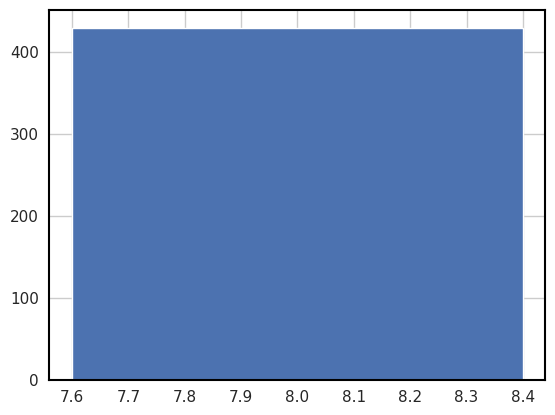

In [142]:
plt.bar(label_lens.keys(), label_lens.values())

<Axes: >

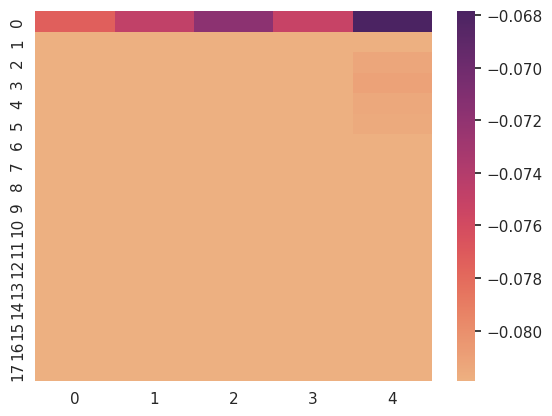

In [148]:
sns.heatmap(all_block_results[0,:,1:6], cmap="flare")

<Axes: >

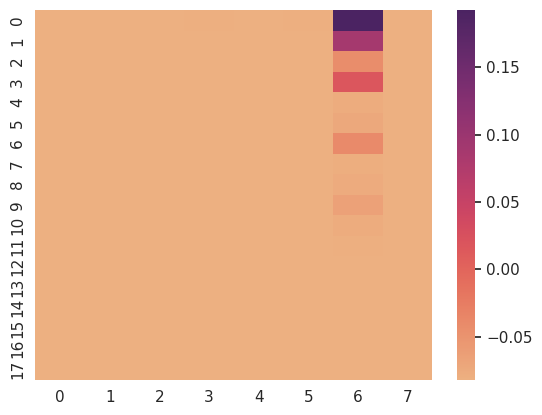

In [144]:
sns.heatmap(all_block_results[1,:,:8], cmap="flare")

<Axes: >

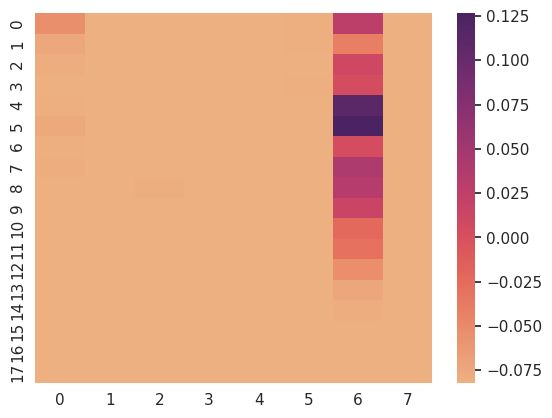

In [145]:
sns.heatmap(all_block_results[2,:,:8], cmap="flare")